In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])
mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)
print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


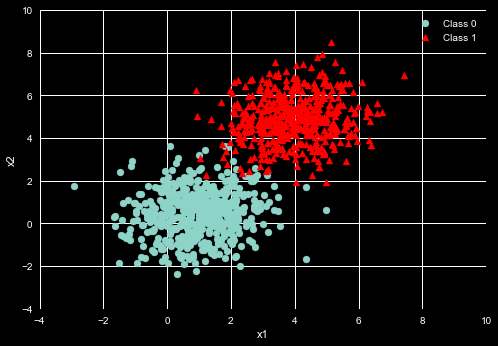

In [3]:
plt.style.use("dark_background")
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
data=np.zeros((1000,3))
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,-1]=1.0
np.random.shuffle(data)
print(data[:10])

[[ 1.70552443  0.5580332   0.        ]
 [ 3.34609888  4.3639938   1.        ]
 [ 0.95705266  1.4851626   0.        ]
 [ 5.45103184  6.50709753  1.        ]
 [ 2.11817651  2.03153195  0.        ]
 [ 0.36762255  1.35330922  0.        ]
 [ 1.46197722 -0.14475476  0.        ]
 [ 0.71964846  0.0490848   0.        ]
 [ 1.49694697  1.32691216  0.        ]
 [ 3.57914543  4.24115487  1.        ]]


In [5]:
split=int(0.8*data.shape[0])
X_train=data[:split,:-1]
X_test=data[split:,:-1]
Y_train=data[:split,-1]
Y_test=data[split:,-1]
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [6]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)
def sigmoid(h):
    return 1.0/(1.0+np.exp(-1.0*h))
def error(y,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m
def get_grad(x,w,b,y):
    grad_b=0.0
    grad_w=np.zeros(w.shape)
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y[i]-hx)*x[i]
        grad_b+=(y[i]-hx)
    grad_w/=m
    grad_b/=m
    return [grad_w,grad_b]
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err=error(y,x,w,b)
    [grad_w,grad_b]=get_grad(x,w,b,y)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    return err,w,b
def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [7]:
loss=[]
acc=[]
W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()
for i in range(1000):
    l,W,b=gradient_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

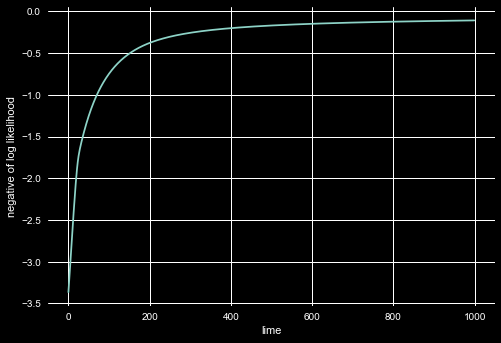

In [8]:
plt.style.use('dark_background')
plt.plot(loss)
plt.ylabel("negative of log likelihood")
plt.xlabel("lime")
plt.show()

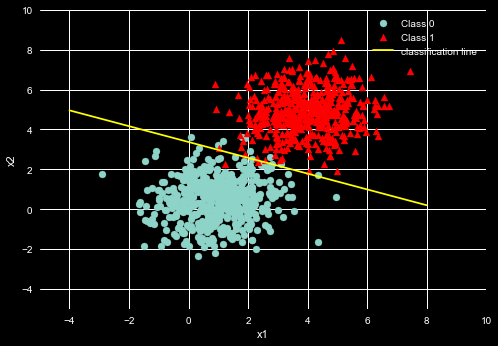

In [10]:
plt.style.use('dark_background')
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='yellow',label='classification line')
plt.legend()
plt.show()

In [11]:
print(W)
print(b)

[0.53672429 1.353343  ]
-4.560831331607908
